# Import the Libraries


In [1]:
!pip install sklearn_features  

In [2]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

## Other
import os, joblib

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Xgboost
from xgboost import XGBRegressor

In [3]:
#!pip install sklearn_features 

In [4]:
# load dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")   
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe() 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isna().sum()  


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df=df.drop('customerID',axis=1)

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  

In [10]:
X = df.drop(columns=['MonthlyCharges'], axis=1)   ## Features
y = df['MonthlyCharges']  

In [11]:
## Random split the dataset t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)
## Check Shapes 
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape) 
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape) 

X_train shape --  (5986, 19)
y_train shape --  (5986,)
X_test shape --  (1057, 19)
y_test shape --  (1057,)


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the columns according to type: numerical or categorical
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]

print('Numerical Columns : \n', num_cols)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['SeniorCitizen', 'tenure', 'TotalCharges']
Categorical Columns : 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


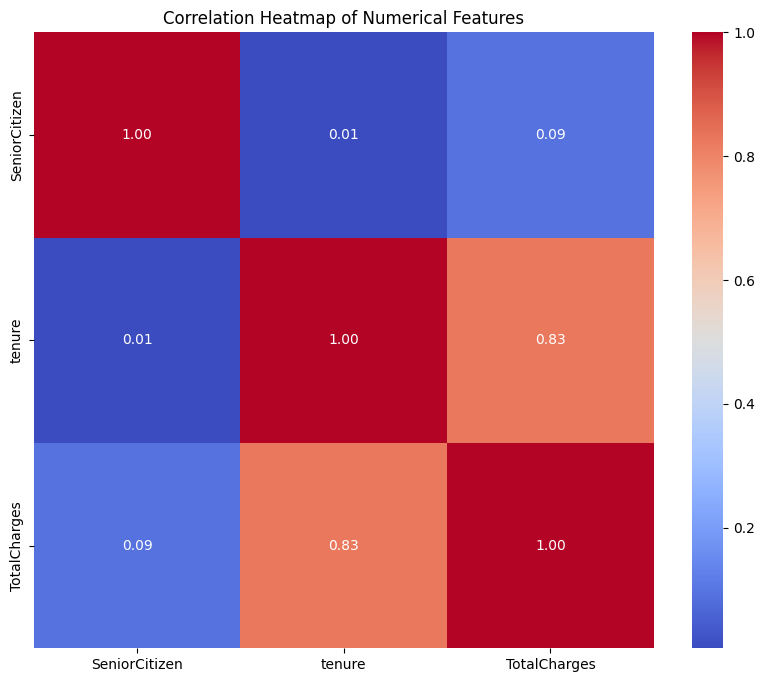

In [13]:
# Create a heatmap for numerical features
num_features = X_train[num_cols]
corr = num_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Standardize the Features


In [14]:
imputer = SimpleImputer(strategy='median') 
imputer.fit(X_train[num_cols])  
X_train_filled = imputer.transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])  

In [15]:
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train_filled)  
X_test_scaled = scaler.transform(X_test_filled)  

In [16]:
categ_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'))  # Set handle_unknown to 'ignore'
])

X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Import necessary libraries
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Define custom transformer for selecting columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Define numerical and categorical column names
num_cols = ['SeniorCitizen', 'tenure']  # List of numerical column names
categ_cols = categ_cols  # List of categorical column names

# Define pipelines
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_cols)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categ_pipeline = Pipeline([
    ('selector', DataFrameSelector(categ_cols)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'))  # Set handle_unknown to 'ignore'
])

# Combine pipelines using FeatureUnion
total_pipeline = FeatureUnion(transformer_list=[
    ('num_pipe', num_pipeline),
    ('categ_pipe', categ_pipeline)
])

# Fit and transform the training data
X_train_final = total_pipeline.fit_transform(X_train)
# Transform the test data
X_test_final = total_pipeline.transform(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Building ML Models
**Evaluation Metric: RMSE**



# LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  

LinearRegression()

In [19]:
## Check scores of this Model (RMSE) using (cross_val_score) 
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_lin = -1 * rmse_scores_lin   
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('*/'*55)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')

RMSE Scores Using LinearRegression --- [1.0371 1.0268 0.9935 1.0301 1.0282]
Mean of RMSE Scores Using LinearRegression --- 1.0231
*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/
RMSE after prediction Using LinearRegression --- 1.0232


# KNeighborsRegressor

In [20]:
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  

KNeighborsRegressor(n_neighbors=8)

In [21]:
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_knn = -1 * rmse_scores_knn  
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('/*'*55)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}') 

RMSE Scores Using KNN --- [4.4066 4.6687 4.8354 4.3546 4.7183]
Mean of RMSE Scores Using KNN --- 4.5967
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*
RMSE after prediction Using KNN --- 4.6004


# RandomForestRegressor 

In [22]:
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train)   

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [23]:
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_forest = -1 * rmse_scores_forest   
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('*/'*55)


y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}') 

RMSE Scores Using RandomForest --- [3.1419 3.2203 3.3421 3.318  3.1259]
Mean of RMSE Scores Using RandomForest --- 3.2297
*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/
RMSE after prediction Using RandomForest --- 3.2308


# RF Tuning


In [24]:
## RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), #8
                      'max_depth': np.arange(4, 20, 2),  #8
                      'max_samples': [0.7, 0.8, 0.9, 1]} #4 


search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)  

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-1.912 total time=   1.4s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2.099 total time=   1.3s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2.172 total time=   1.3s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-1.880 total time=   1.3s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-1.994 total time=   1.3s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-1.747 total time=   2.0s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-1.891 total time=   2.1s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2.009 total time=   2.0s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-1.789 total time=   2.0s
[CV 5/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-1.826 total t

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [25]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator 
best_forest = search_random_forest.best_estimator_  
print('best_forest -- ', best_forest) 

best_foresr_params --  {'n_estimators': 250, 'max_samples': 0.9, 'max_depth': 12}
best_forest --  RandomForestRegressor(max_depth=12, max_samples=0.9, n_estimators=250,
                      n_jobs=-1, random_state=42)


In [26]:
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

print('****'*30)

y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  

RMSE Scores Using Tuned RandomForest --- [1.3219 1.3753 1.4174 1.3376 1.3513]
Mean of RMSE Scores Using Tuned RandomForest --- 1.3607
************************************************************************************************************************
RMSE after prediction Using Tuned RandomForest --- 1.3611


# XGBRegressor

In [27]:
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_xgb = -1 * rmse_scores_xgb   
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)


y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')   

RMSE Scores Using Tuned XGBoost --- [1.1279 1.1269 1.1008 1.1041 1.1154]
Mean of RMSE Scores Using XGBoost --- 1.1150
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 1.1151


# Tuning XGBoost

In [29]:
# XGBoost using GridSearchCV 
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV 
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)   

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-1.244 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-1.230 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-1.170 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-1.227 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-1.162 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-1.201 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-1.171 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-1.162 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_est

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [30]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [31]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  

RMSE Scores Using Tuned Tuned XGBoost --- [1.0916 1.0816 1.0728 1.1009 1.093 ]
Mean of RMSE Scores Using Tuned XGBoost --- 1.0880
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 1.0880


# Models Comparison

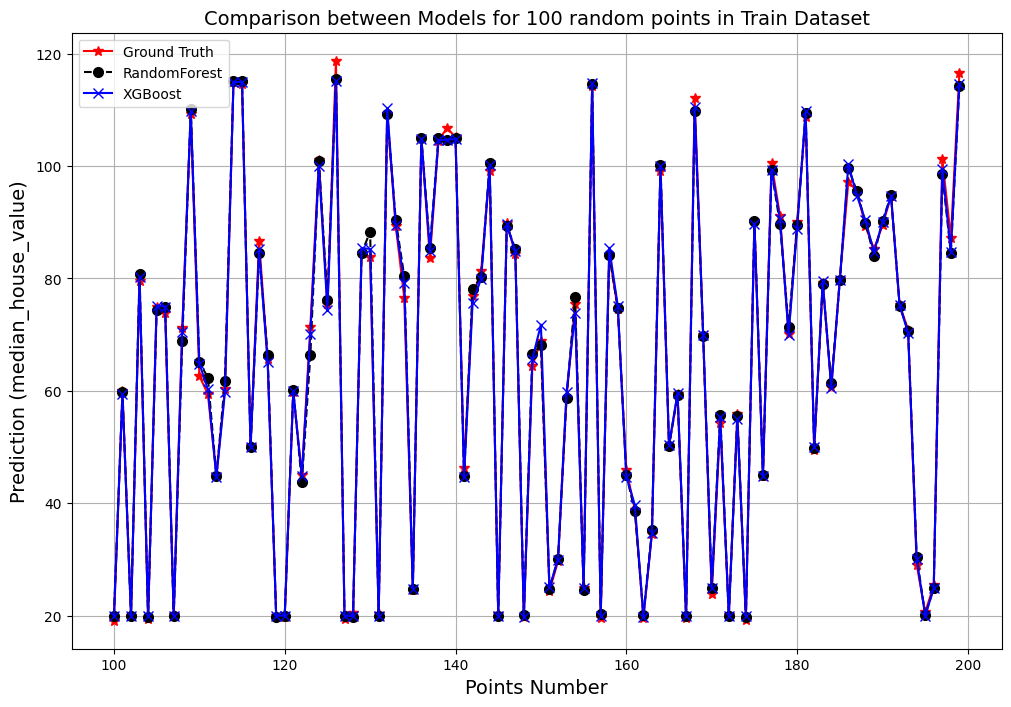

In [32]:
## Plotting
x_x = np.arange(100, 200)  
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  
plt.plot(x_x, y_pred_tuned_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_tuned_xgb[100:200], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show() 